Red Wine Quality Dataset을 이용한 와인 품질 예측 모델 구현

In [6]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

data = pd.read_csv('winequality-red.csv')
df = pd.DataFrame(data)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [3]:
# 결측값 확인
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [8]:
# 사용할 수치형 변수 스케일링 (GPT에서 품질에 영향을 주는 컬럼 추천받음)
from sklearn.preprocessing import StandardScaler

num_cols = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'density']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [9]:
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4          0.961877    -1.391472             1.9      0.076   
1               7.8          1.967442    -1.391472             2.6      0.098   
2               7.8          1.297065    -1.186070             2.3      0.092   
3              11.2         -1.384443     1.484154             1.9      0.075   
4               7.4          0.961877    -1.391472             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2          0.403229    -0.980669             2.0      0.090   
1595            5.9          0.123905    -0.877968             2.2      0.062   
1596            6.3         -0.099554    -0.723916             2.3      0.076   
1597            5.9          0.654620    -0.775267             2.0      0.075   
1598            6.0         -1.216849     1.021999             3.6      0.067   

      free sulfur dioxide  

In [13]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# 데이터 분할
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 랜덤 포레스트

In [23]:
# 랜덤 포레스트 모델 학습
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# 예측 및 평가
y_pred1 = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.4f}")

MSE: 0.30
R2 Score: 0.5398


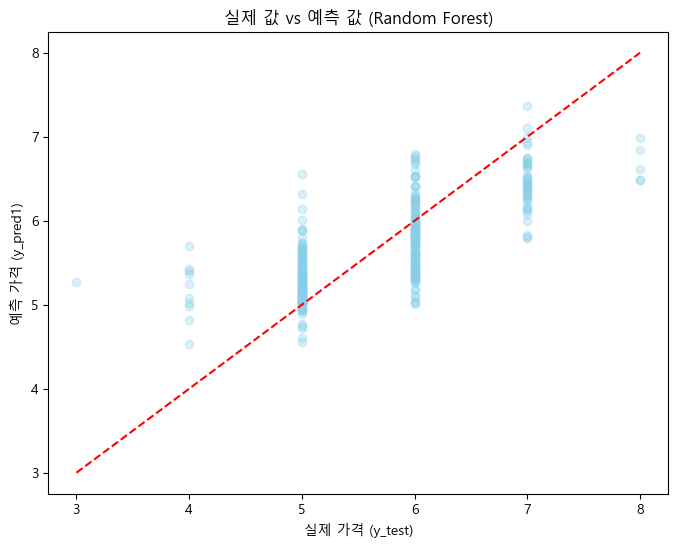

In [27]:
# 랜덤 포레스트 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1, alpha=0.3, color='skyblue')
plt.xlabel("실제 가격 (y_test)")
plt.ylabel("예측 가격 (y_pred1)")
plt.title("실제 값 vs 예측 값 (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선(완벽 예측선)
plt.show()

##### 결정 트리

In [31]:
# 결정 트리 모델 학습
model2 = DecisionTreeRegressor(max_depth=3)
model2.fit(X_train, y_train)

# 예측 및 평가
y_pred2 = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.4f}")

MSE: 0.47
R2 Score: 0.2882


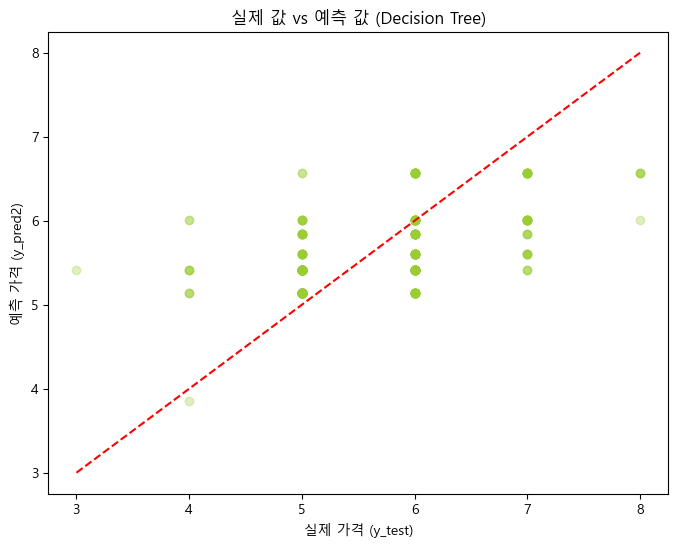

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, alpha=0.3, color='yellowgreen')
plt.xlabel("실제 가격 (y_test)")
plt.ylabel("예측 가격 (y_pred2)")
plt.title("실제 값 vs 예측 값 (Decision Tree)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선(완벽 예측선)
plt.show()

##### 선형 회귀

In [33]:
# 선형 회귀 모델 학습
model3 = LinearRegression()
model3.fit(X_train, y_train)

# 예측 및 평가
y_pred3 = model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.4f}")

MSE: 0.39
R2 Score: 0.4032


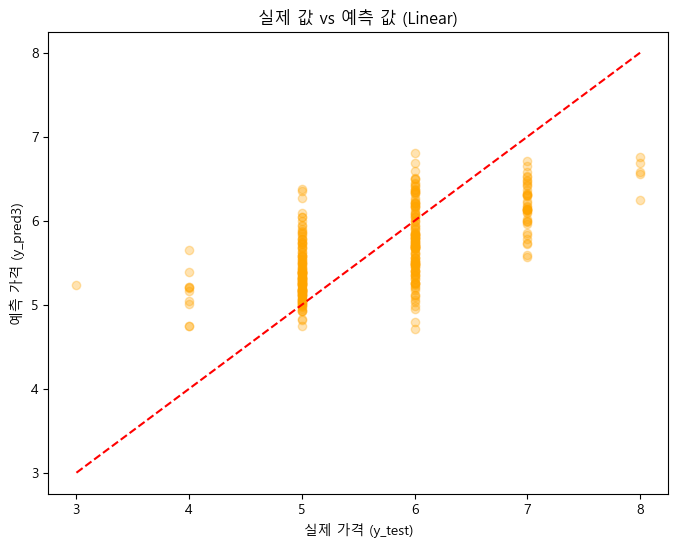

In [41]:
# 선형 회귀 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3, alpha=0.3, color='orange')
plt.xlabel("실제 가격 (y_test)")
plt.ylabel("예측 가격 (y_pred3)")
plt.title("실제 값 vs 예측 값 (Linear)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선(완벽 예측선)
plt.show()

##### SVR

In [35]:
# SVR 모델 학습
model4 = LinearRegression()
model4.fit(X_train, y_train)

# 예측 및 평가
y_pred4 = model4.predict(X_test)
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.4f}")

MSE: 0.39
R2 Score: 0.4032


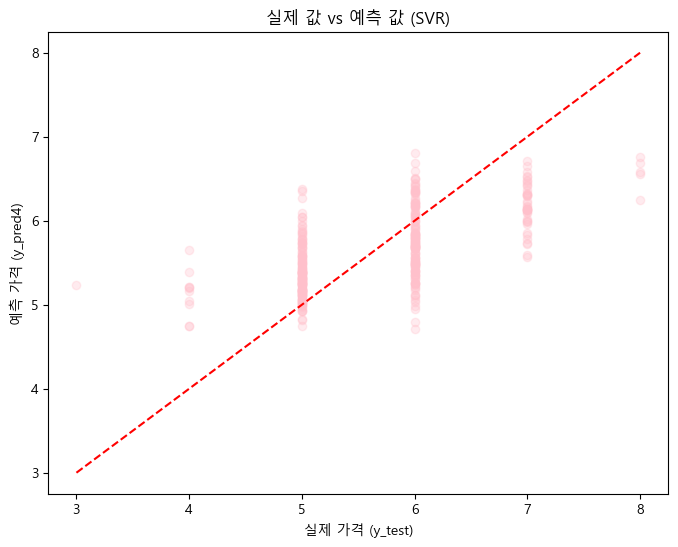

In [ ]:
# SVR 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred4, alpha=0.3, color='pink')
plt.xlabel("실제 가격 (y_test)")
plt.ylabel("예측 가격 (y_pred4)")
plt.title("실제 값 vs 예측 값 (SVR)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선(완벽 예측선)
plt.show()

In [57]:
results_df = pd.DataFrame({
    '실제': y_test.values,
    'RF': y_pred1,
    'DT': y_pred2,
    'LR': y_pred3,
    'SVR': y_pred4
})

results_df = results_df.round(3)

print(results_df.head())

   실제    RF     DT     LR    SVR
0   6  5.30  5.412  5.347  5.347
1   5  5.22  5.137  5.056  5.056
2   6  5.46  5.412  5.664  5.664
3   5  5.19  5.137  5.465  5.465
4   6  6.00  6.014  5.725  5.725
